# ENTREGABLE 5

# INSTRUCCIONES

Entrenar un perceptrón para que sea capaz de simular el comportamiento de una puerta AND.

- Generar 5000 muestras aleatorias de entrenamiento, 500 de validación y 500 de test.


*Pistas*

 * w es un vector que corresponde al valor de los pesos de cada neurona de entrada
 * b es un valor que corresponde al bias del modelo
 * El valor de la suma ponderada será el valor resultante de: *(pesos x entradas) + bias*. Para ello utilizar el producto escalar (*np.dot*)


In [21]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [22]:
class Perceptron:
    
    # Inicializamos la clase perceptron y definimos los parámetros de la clase. Los iniciamos de manera aleatoria.
    
    def __init__(self, input_size):
        # Inicializamos los pesos y el sesgo de manera aleatoria

        self.weights = np.random.rand(input_size)  # Asegúrate de que input_size sea 2 en este caso
        self.bias = np.random.rand()
    
    # Esta función es solamente la activación de la neurona, puedo tomar valores de 0 a 1
    def sigmoid(self, x):
        # Función de activación: sigmoide
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        # Derivada de la función sigmoide
        return self.sigmoid(x) * (1 - self.sigmoid(x))

    def predict(self, inputs):
        # Calculamos la suma ponderada de las entradas
        #calcula el producto punto entre las entradas y los pesos del modelo. 
        # Esto produce una suma ponderada de las entradas, donde cada entrada es multiplicada por su correspondiente peso
        weighted_sum =  np.dot(inputs, self.weights) + self.bias
        # Aplicamos la función de activación y devolvemos la predicción
        return self.sigmoid(weighted_sum)

    def train(self, X_train, Y_train, X_validation, Y_validation, learning_rate=0.01, epochs=100):

        train_error_by_epoch = []
        val_error_by_epoch = []

        for epoch in range(epochs):
            train_error_acum = 0
            for i in range(X_train.shape[0]): #X_train.shape[0] devuelve el número total de muestras en el conjunto de entrenamiento.

                inputs = X_train[i]

                # Calcular la predicción del perceptrón
                prediction = self.predict(inputs)

                # Calcular el error
                diferencia = Y_train[i]-prediction ## a completar con etiqueta - prediccion
                error = diferencia**2 ## a completar con el error cuadratico medio
                train_error_acum += error # Aquí se acumula el error


                # Multiplicación y Escala: La derivada del error respecto a los pesos se obtiene multiplicando estos
                # términos y escalándolos por -2. El factor de 2 proviene de la derivada del término cuadrático de la 
                # función de pérdida (), y el signo negativo indica que queremos mover los pesos en la dirección opuesta al incremento del error
                #  (descenso del gradiente).

                # Actualizar pesos y sesgo mediante el descenso del gradiente
                weights_derivative = -2 * diferencia * self.sigmoid_derivative(prediction) * inputs
                bias_derivative = -2 * diferencia * self.sigmoid_derivative(prediction)
                self.weights = self.weights - learning_rate * weights_derivative
                self.bias = self.bias - learning_rate * bias_derivative

            # Calcular el error promedio por epoch
            train_error_acum /=(X_train.shape[0])
            train_error_by_epoch.append(train_error_acum)

            val_error_acum = 0
            for i in range(X_validation.shape[0]):
                inputs = X_validation[i]
                prediction =  self.predict(inputs)

                diferencia = Y_validation[i]-prediction # Entre el valor real y la predicción del modelo
                error = diferencia ** 2##  error cuadratico para el valor i
                val_error_acum += error # Aquí se acumula el error

            # Calcular el error promedio de validación por epoch
            val_error_acum /=(X_validation.shape[0])
            val_error_by_epoch.append(val_error_acum)
            # Visualización del progreso
            if epoch % 10 == 0:
                print('epoch:', epoch, '| train error:', train_error_acum, '| val error:', val_error_acum)

        # Visualización del error de entrenamiento por epoch

        print("Training Error by Epoch:", train_error_by_epoch)
        print("Validation Error by Epoch:", val_error_by_epoch)

        # plt.figure()
        # plt.plot(range(epochs), train_error_by_epoch, '-b')
        # plt.xlabel('Epoch')
        # plt.ylabel('Error cuadrático promedio')
        # plt.title('Error de Entrenamiento por Epoch')
        # plt.show()

        # # Visualización del error de validación por epoch
        # plt.figure()
        # plt.plot(range(epochs), val_error_by_epoch, '-b')
        # plt.xlabel('Epoch')
        # plt.ylabel('Error cuadrático promedio')
        # plt.title('Error de Validación por Epoch')
        # plt.show()

        plt.figure(figsize=(10, 6))  # Define el tamaño del gráfico (opcional)

        # Graficamos los dos errores en un mismo plot
        plt.plot(range(epochs), train_error_by_epoch, '-b', label='Training Error')
        plt.plot(range(epochs), val_error_by_epoch, '-r', label='Validation Error')
        plt.xlabel('Epoch')
        plt.ylabel('Error cuadrático promedio')
        plt.title('Error de Entrenamiento y Validación por Epoch')
        plt.legend()
        plt.show()

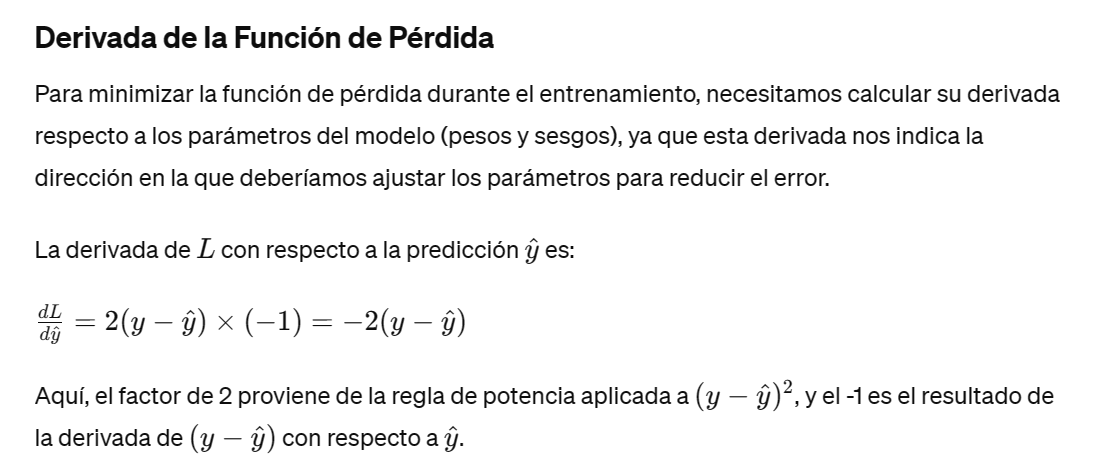

In [23]:
# Datos de entrenamiento y validación para la puerta AND
N_samples = 6000
N_inputs = 2 # Numero de entradas de la neurona, porque los datos de entrenamiento son :
train_size = 0.915
N_validation = int((1 - train_size) * N_samples)

X = np.tile([[0, 0], [0, 1], [1, 0], [1, 1]], (N_samples // 4, 1))

Y = np.tile([0, 0, 0, 1], N_samples // 4)

from sklearn.model_selection import train_test_split
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, train_size=train_size, random_state=42)


# Visualizar algunas muestras
print("X_data (first 5 samples):")
print(X_train[:5])

print("Y_data (first 5 samples):")
print(Y_train[:5])

print(f'Array X_train {X_train.shape}')
print(Y_train.shape)

X_data (first 5 samples):
[[0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]]
Y_data (first 5 samples):
[0 1 1 1 0]
Array X_train (5490, 2)
(5490,)


In [24]:
# Crear y entrenar el perceptrón para la puerta AND
perceptron_and = Perceptron(input_size=N_inputs)

In [25]:
# Comprobar predicción del modelo sin entrenar
index = 4

th = 0.5
print('Input:', X_validation[index])
inputs = X_validation[index]
prob = perceptron_and.predict(inputs)
print('Probabilidad:', prob)
print('Prediction:', (prob>th).astype('int'))

Input: [0 0]
Probabilidad: 0.6597321832659347
Prediction: 1


In [26]:
# Obtenemos un overview de como funciona el modelo sin entrenar de forma aleatoria
predictions = []

## itera por cada muestra de validación y genera la matriz de confusion

for i in range(X_validation.shape[0]):
    inputs = X_validation[i]
    threshold =  perceptron_and.predict(inputs)
    prediction = (prob > threshold).astype(int)  # Aplicar umbral y convertir a entero
    predictions.append(prediction)

print(predictions)

threshold = 0.5

# Calcula la matriz de confusión
conf_matrix = confusion_matrix(Y_validation, predictions)

# Visualiza la matriz de confusión
print("Matriz de Confusión:")
print(conf_matrix)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

epoch: 0 | train error: 0.15527984220591148 | val error: 0.09004690299119915
epoch: 10 | train error: 0.005188528889330874 | val error: 0.004794383079559004
epoch: 20 | train error: 0.0015441007561368505 | val error: 0.0014799352373995422
epoch: 30 | train error: 0.0007226691365077873 | val error: 0.0007023616883960798
epoch: 40 | train error: 0.00041587986074617265 | val error: 0.00040715011830320946
epoch: 50 | train error: 0.00026942047662214933 | val error: 0.0002649460355250006
epoch: 60 | train error: 0.0001884597720566798 | val error: 0.0001858894128338498
epoch: 70 | train error: 0.0001391066112609454 | val error: 0.00013750738233684373
epoch: 80 | train error: 0.00010683946439919534 | val error: 0.00010578406453940238
epoch: 90 | train error: 8.460337139400922e-05 | val error: 8.387464013534172e-05
Training Error by Epoch: [0.15527984220591148, 0.06726812533789646, 0.040456780954866524, 0.02720053533395719, 0.019520399329859293, 0.014659104272046542, 0.011390301273783765, 0.00

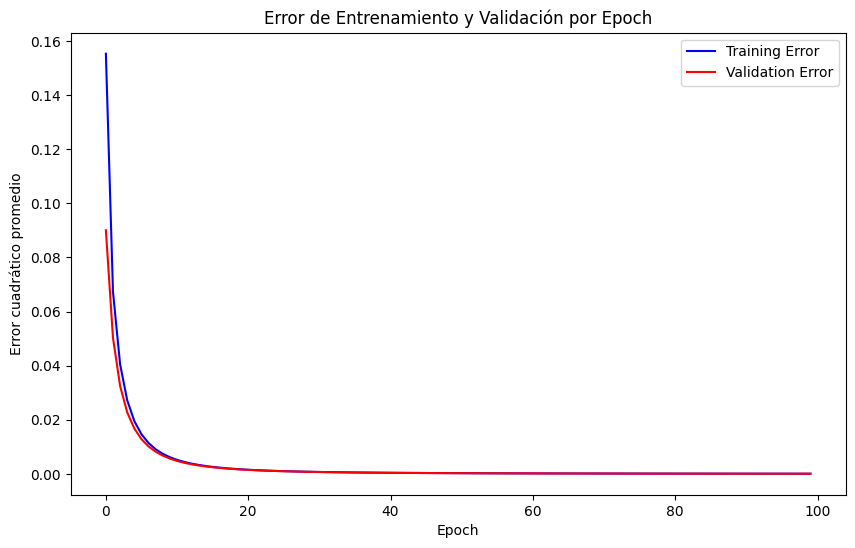

In [27]:
# Entrenar el perceptrón
perceptron_and.train(X_train, Y_train, X_validation, Y_validation)

In [28]:
# Comprobar ahora la predicción del modelo entrenado en el set de validacion
index = 4
th = 0.5
print('Input:', X_validation[index])
inputs = X_validation[index]
prob = perceptron_and.predict(inputs)
print('Probabilidad:', prob)
print('Prediction:', (prob>th).astype('int'))

Input: [0 0]
Probabilidad: 7.278688567623209e-07
Prediction: 0


In [29]:
# Evaluamos cómo funciona el modelo en el set de validación
predictions_valdation = []
## itera por cada muestra de validación guardando las predicciones en una lista y genera la matriz de confusion
for i in range(X_validation.shape[0]):
    inputs = X_validation[i]
    threshold_val =  perceptron_and.predict(inputs)
    prediction_val = (prob > threshold).astype(int)  # Aplicar umbral y convertir a entero
    predictions_valdation.append(prediction_val)

# Calcula la matriz de confusión
conf_matrix_val = confusion_matrix(Y_validation, predictions_valdation)

# Visualiza la matriz de confusión
print("Matriz de Confusión:")
print(conf_matrix_val)

Matriz de Confusión:
[[387   0]
 [123   0]]


In [32]:
# Evaluamos cómo funciona el modelo en el set de test
N_samples = 500

## Generar el set de test (de forma similar al de validación)
X_test = np.tile([[0, 0], [0, 1], [1, 0], [1, 1]], (N_samples // 4, 1))
Y_test = np.tile([0, 0, 0, 1], N_samples // 4)
## itera por cada muestra de test guardando las predicciones en una lista y genera la matriz de confusion
predictions_test=[]

for i in range(X_test.shape[0]):
    inputs = X_test[i]
    threshold_test =  perceptron_and.predict(inputs)
    prediction_test = (prob > threshold).astype(int)  # Aplicar umbral y convertir a entero
    predictions_test.append(prediction_test)

# Calcula la matriz de confusión
conf_matrix_test = confusion_matrix(Y_test, predictions_test)

# Visualiza la matriz de confusión
print("Matriz de Confusión:")
print(conf_matrix_test)

Matriz de Confusión:
[[375   0]
 [125   0]]
